In [102]:
import numpy as np

import pandas as pd
from datascience import *
from sklearn.linear_model import LinearRegression
# These lines do some fancy plotting magic.\n",

from ipywidgets import interact




import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [103]:
nfa_all = pd.read_csv("NFA 2018.csv")
nfa_all.head(10)


,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
0,Armenia,ARM,Asia,Western Asia,1992,BiocapPerCap,1.611286e-01,0.135023,0.083836,0.013718,0.033669,0.000000e+00,4.273741e-01,949.033,3449000
1,Armenia,ARM,Asia,Western Asia,1992,BiocapTotGHA,5.558130e+05,465763.337400,289190.662300,47320.224590,116139.598200,0.000000e+00,1.474227e+06,949.033,3449000
2,Armenia,ARM,Asia,Western Asia,1992,EFConsPerCap,3.909225e-01,0.189137,0.000001,0.004138,0.033669,1.112225e+00,1.730092e+00,949.033,3449000
3,Armenia,ARM,Asia,Western Asia,1992,EFConsTotGHA,1.348487e+06,652429.066600,4.327841,14272.803690,116139.598200,3.836620e+06,5.967954e+06,949.033,3449000
4,Armenia,ARM,Asia,Western Asia,1992,EFExportsPerCap,1.124910e-03,0.002283,0.000000,0.000438,0.000000,4.819043e-02,5.203676e-02,949.033,3449000
5,Armenia,ARM,Asia,Western Asia,1992,EFExportsTotGHA,3.880378e+03,7875.331688,0.000000,1512.195296,0.000000,1.662329e+05,1.795008e+05,949.033,3449000
6,Armenia,ARM,Asia,Western Asia,1992,EFImportsPerCap,2.309189e-01,0.056397,0.000001,0.003312,0.000000,8.791121e-02,3.785406e-01,949.033,3449000
7,Armenia,ARM,Asia,Western Asia,1992,EFImportsTotGHA,7.965547e+05,194541.060900,4.327841,11426.058040,0.000000,3.032497e+05,1.305776e+06,949.033,3449000
8,Armenia,ARM,Asia,Western Asia,1992,EFProdPerCap,1.611286e-01,0.135023,0.000000,0.001264,0.033669,1.072504e+00,1.403588e+00,949.033,3449000
9,Armenia,ARM,Asia,Western Asia,1992,EFProdTotGHA,5.558130e+05,465763.337400,0.000000,4358.940944,116139.598200,3.699604e+06,4.841678e+06,949.033,3449000


In [104]:
def correlation_from_table(df, col_x, col_y):
    standard_units_x = (df[col_x] - np.mean(df[col_x] ) )/ np.std(df[col_x])
                        
    standard_units_y = (df[col_y] - np.mean(df[col_y] ) )/ np.std(df[col_y])
                        
    correlation = np.mean(standard_units_x * standard_units_y)
    return correlation

def slope(df, col_x, col_y):
    r = correlation_from_table(df, col_x, col_y)
    return r*np.std(df[col_x])/np.std(df[col_y])
                    

def intercept(df, col_x, col_y):
    return np.mean(df[col_y]) - slope(df, col_x, col_y)*np.mean(df[col_x])


In [105]:
def standard_units(data):
    standard_units_x = (data - np.mean(data)) / np.std(data)
    return standard_units_x
                        

In [211]:
# giant function
def giantfunction(year): 
    #datacleaning
    one = nfa_all.drop(columns=["ISO alpha-3 code", "UN_subregion", "crop_land", "forest_land", "fishing_ground", "grazing_land", "built_up_land", "total"])
    two = one.loc[one["year"] == year]
    three = two.loc[two["record"] == "EFConsPerCap"]
    four = three.dropna()
    #econ level
    low = four["Percapita GDP (2010 USD)"].quantile(.33)
    middle = four["Percapita GDP (2010 USD)"].quantile(.66)
    high = four["Percapita GDP (2010 USD)"].quantile(1)
    
    #splitting country by econ levels
    lowcountries = four.loc[four["Percapita GDP (2010 USD)"] < low]
    middlecountries = four.loc[(four["Percapita GDP (2010 USD)"] > low) & (four["Percapita GDP (2010 USD)"] <= middle)]

    highcountries = four.loc[(four["Percapita GDP (2010 USD)"] > middle) & (four["Percapita GDP (2010 USD)"] <= high)]
    



     #calculating linear regression for lowcountries
    X_low = lowcountries.iloc[:, 4].values.reshape(-1, 1)  # values converts it into a numpy array
    Y_low = lowcountries.iloc[:, 5].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor_low = LinearRegression()  # create object for the class
    linear_regressor_low.fit(X_low, Y_low)  # perform linear regression
    Y_pred_low = linear_regressor_low.predict(X_low)  #
    
    lowcountryslope = linear_regressor_low.coef_

    lowcountryintercept = linear_regressor_low.intercept_
    
    plt.scatter(X_low, Y_low)
    plt.plot(X_low, Y_pred_low, color='red')
    plt.title('low countries '+ "(" + str(year) + ")")
    plt.xlabel("carbon (metric tons)")
    plt.ylabel("Percapita GDP (2010 USD)")
    plt.xlim(0, 2)
    plt.ylim(0, 2600)
    plt.show()
    
    
    #calculating linear regression for middle countries
    X_middle = middlecountries.iloc[:, 4].values.reshape(-1, 1)  # values converts it into a numpy array
    Y_middle = middlecountries.iloc[:, 5].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor_middle = LinearRegression()  # create object for the class
    linear_regressor_middle.fit(X_middle, Y_middle)  # perform linear regression
    Y_pred_middle = linear_regressor_middle.predict(X_middle)  #
    
    
    middlecountryslope = linear_regressor_middle.coef_

    middlecountryintercept = linear_regressor_middle.intercept_
    
    plt.scatter(X_middle, Y_middle)
    plt.plot(X_middle, Y_pred_middle, color='red')
    plt.title('middle countries '+ "(" + str(year) + ")")
    plt.xlabel("carbon (metric tons)")
    plt.ylabel("Percapita GDP (2010 USD)")
    plt.xlim(0, 6)
    plt.ylim(0, 12000)
    plt.show()
    
    #calculating linear regression for high countries
    X_high = highcountries.iloc[:, 4].values.reshape(-1, 1)  # values converts it into a numpy array
    Y_high = highcountries.iloc[:, 5].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor_high = LinearRegression()  # create object for the class
    linear_regressor_high.fit(X_high, Y_high)  # perform linear regression
    Y_pred_high = linear_regressor_high.predict(X_high)  #
    
    highcountryslope = linear_regressor_high.coef_

    highcountryintercept = linear_regressor_high.intercept_    
    
    plt.scatter(X_high, Y_high)
    plt.plot(X_high, Y_pred_high, color='red')
    plt.title("high countries " + "(" + str(year) + ")")
    plt.xlabel("carbon (metric tons)")
    plt.ylabel("Percapita GDP (2010 USD)")
    plt.xlim(0,15)
    plt.ylim(0, 90000)
    plt.show()
    
    #calculating linear regression for world

    X_world = four.iloc[:, 4].values.reshape(-1, 1)  # values converts it into a numpy array
    Y_world = four.iloc[:, 5].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor_world = LinearRegression()  # create object for the class
    linear_regressor_world.fit(X_world, Y_world)  # perform linear regression
    Y_pred_world = linear_regressor_world.predict(X_world)  #
    
    
    worldcountryslope = linear_regressor_world.coef_

    worldcountryintercept = linear_regressor_world.intercept_    
    
    
    plt.scatter(X_world, Y_world)
    plt.plot(X_world, Y_pred_world, color='red')
    plt.title("world " + "(" + str(year) + ")")
    plt.xlabel("carbon (metric tons)")
    plt.ylabel("Percapita GDP (2010 USD)")
    plt.xlim(0,15)
    plt.ylim(0, 100000)
    plt.show()
    
    return make_array(lowcountryslope, lowcountryintercept, middlecountryslope, middlecountryintercept, highcountryslope, highcountryintercept, worldcountryslope, worldcountryintercept)
    
    

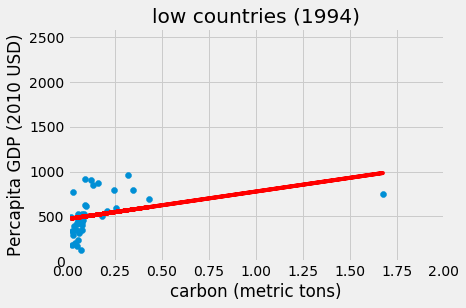

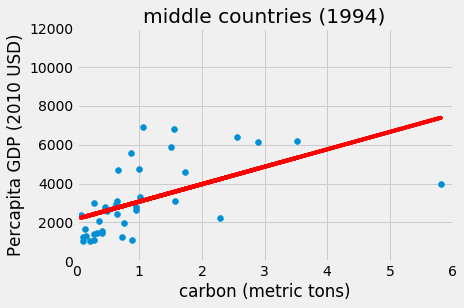

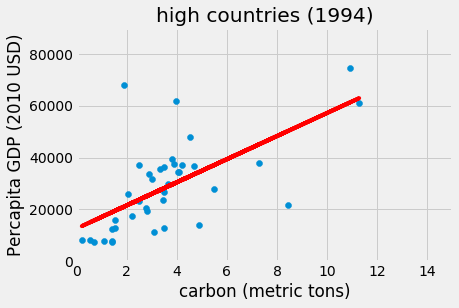

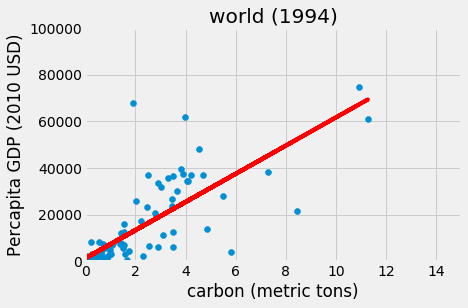

array([[305.64921914150534],
       [471.8151140835923],
       [895.8819485048275],
       [2177.0032207952145],
       [4458.873201613199],
       [12649.099385507261],
       [6037.8055528711675],
       [1276.211298260283]], dtype=object)

In [212]:
giantfunction(1994)


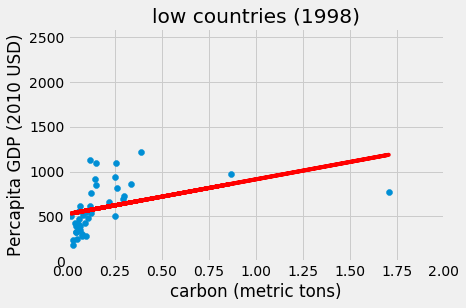

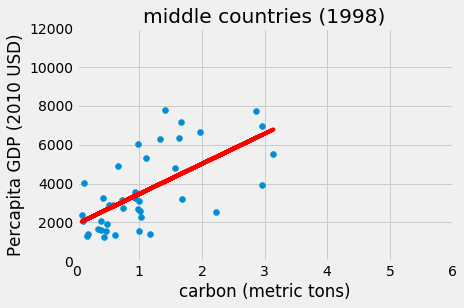

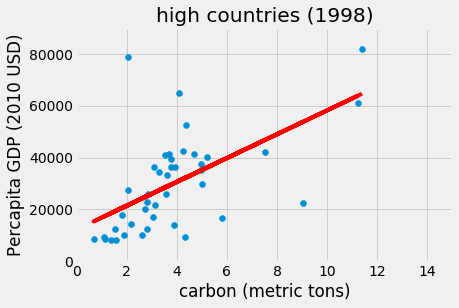

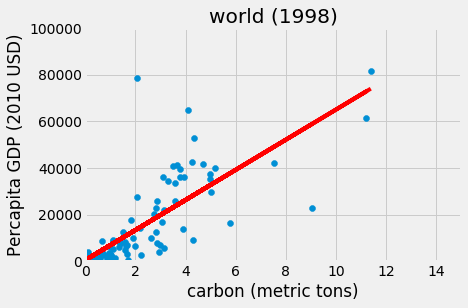

array([[386.6752819821822],
       [526.9918330088382],
       [1548.9061500139358],
       [1917.9526944840388],
       [4597.6087603501155],
       [12251.790384911023],
       [6452.4055135643375],
       [490.6951570260826]], dtype=object)

In [213]:
giantfunction(1998)


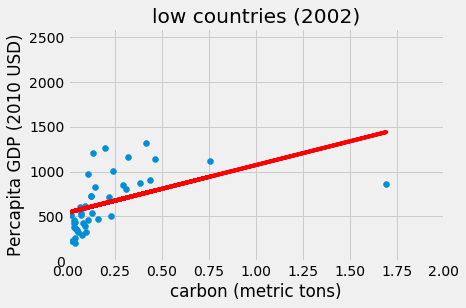

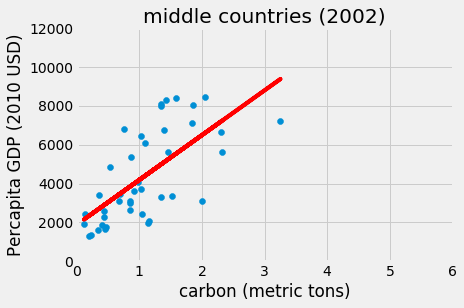

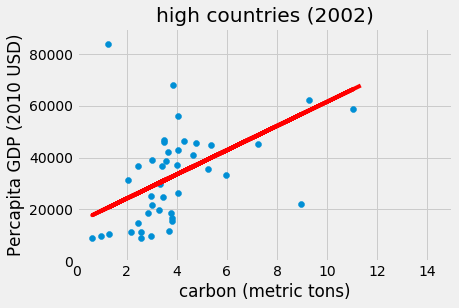

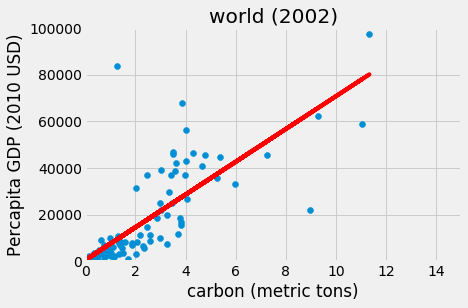

array([[529.4387020723718],
       [543.2299876554678],
       [2303.49017245684],
       [1885.0128270355467],
       [4668.912787257893],
       [14867.275065867805],
       [7022.252558330881],
       [519.670992647234]], dtype=object)

In [214]:
giantfunction(2002)


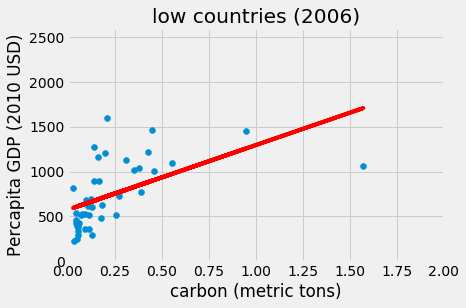

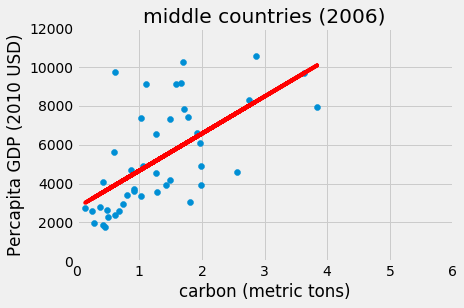

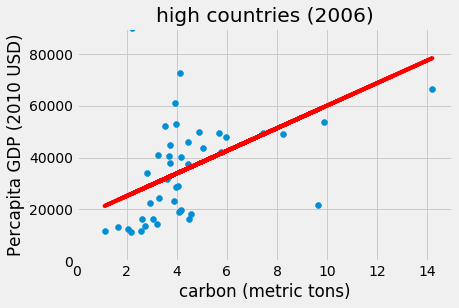

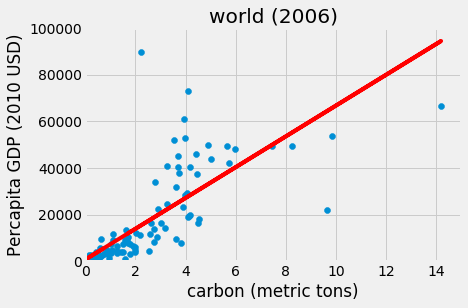

array([[720.4818491897316],
       [575.093096355253],
       [1908.9355229495345],
       [2753.1171932905627],
       [4359.909446810404],
       [16468.647066678914],
       [6598.31672496106],
       [749.4181032590222]], dtype=object)

In [215]:
giantfunction(2006)


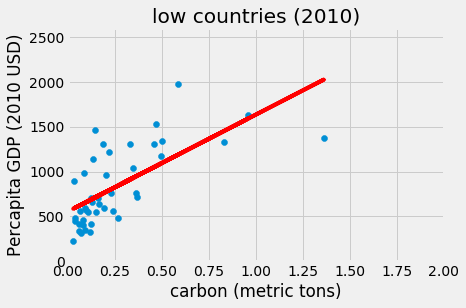

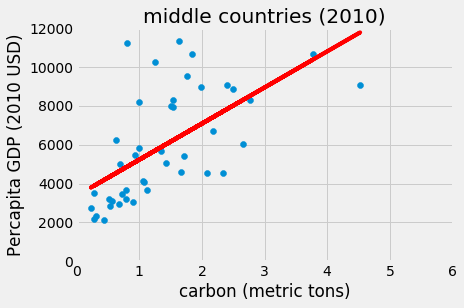

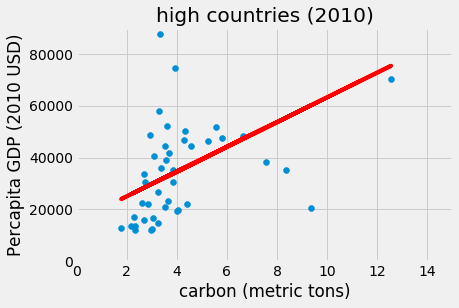

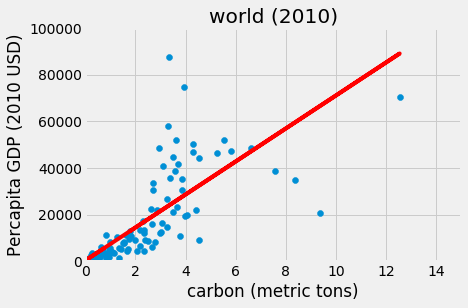

array([[1079.4283008463547],
       [555.6053166741206],
       [1856.7149595306134],
       [3372.9883117300437],
       [4773.427840939364],
       [15518.301249031447],
       [7073.027217607106],
       [342.5653646693863]], dtype=object)

In [216]:
giantfunction(2010)


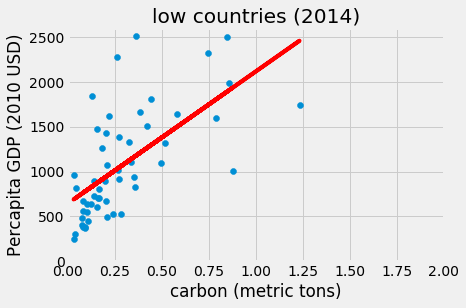

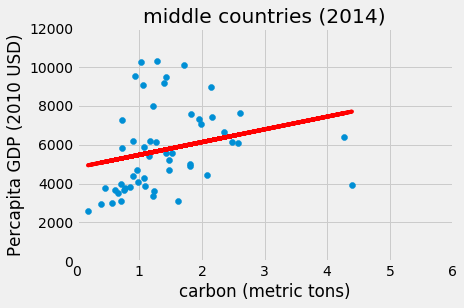

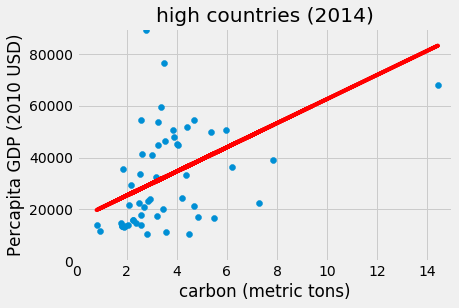

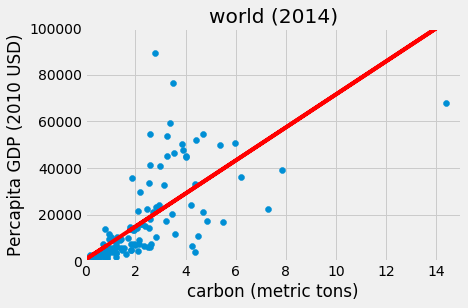

array([[1471.6442105341284],
       [644.986493505916],
       [655.6843487652031],
       [4820.408813393031],
       [4657.137038996285],
       [16052.737932680797],
       [7080.184673912135],
       [729.6901840191967]], dtype=object)

In [217]:

giantfunction(2014)

